# Introduction


'Mr Beast' the online alias of the famous youtuber James Stephen "Jimmy" Donaldson, American Youtuber, online personality, entrepreneur, and philanthropist, he began posting videos to YouTube in early 2012, at the age of 13.
This dataset contains 247 different videos from his Youtube channle.








<img src="https://logos-world.net/wp-content/uploads/2021/09/Mr-Beast-Logo.png" alt="Cat" width="200"/>



# Overview on the dataset

In [35]:
# Importing the needed libraries
import pandas as pd
from random import randint
from scipy.stats import entropy  # an approach to calculate the uniquness of a feature, for nummerical values
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Reading the dataset into a dataframe
FilePath_MrBeast = f'/content/drive/MyDrive/mrBeast/MrBeast_youtube_stats.csv'
df = pd.read_csv(FilePath_MrBeast)
df_with_tumbnail = pd.read_csv(FilePath_MrBeast)

In [37]:
# we are working with 26 features (column), 247 record
# So initially, this dataset gathered information about 247 videos from mr beast youtube channle
dataset_size = df.shape
dataset_size

(247, 26)

In [38]:
# What are the features(columns) that we are working with
features = df.columns
print(features)

Index(['id', 'title', 'description', 'publishTime', 'kind_stats',
       'duration_seconds', 'viewCount', 'likeCount', 'commentCount',
       'thumbnails.default.url', 'thumbnails.default.width',
       'thumbnails.default.height', 'thumbnails.medium.url',
       'thumbnails.medium.width', 'thumbnails.medium.height',
       'thumbnails.high.url', 'thumbnails.high.width',
       'thumbnails.high.height', 'contentDetails.duration',
       'contentDetails.dimension', 'topicDetails.topicCategories',
       'snippet.defaultLanguage', 'localizations.en.title',
       'localizations.en.description', 'snippet.tags',
       'contentDetails.contentRating.ytRating'],
      dtype='object')


In [39]:
# Check the first 10 records of the dataset
df.head(10)

,id,title,description,publishTime,kind_stats,duration_seconds,viewCount,likeCount,commentCount,thumbnails.default.url,...,thumbnails.high.width,thumbnails.high.height,contentDetails.duration,contentDetails.dimension,topicDetails.topicCategories,snippet.defaultLanguage,localizations.en.title,localizations.en.description,snippet.tags,contentDetails.contentRating.ytRating
0,TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,youtube#video,861,84717282.0,2876493.0,128922.0,https://i.ytimg.com/vi/TQHEJj68Jew/default.jpg,...,480.0,360.0,PT14M21S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
1,00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,youtube#video,729,32090178.0,2125183.0,73593.0,https://i.ytimg.com/vi/00NgUctWoLQ/default.jpg,...,480.0,360.0,PT12M9S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,en,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,NaN,NaN
2,NaN,MrBeast,Accomplishments - Raised $20000000 To Plant 20...,2012-02-20 00:43:50+00:00,NaN,0,NaN,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLTctGKJ32CdDLiS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,youtube#video,709,101745632.0,3110824.0,162796.0,https://i.ytimg.com/vi/ayXxwJJId_c/default.jpg,...,480.0,360.0,PT11M49S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
4,cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,youtube#video,482,50008942.0,2359606.0,120621.0,https://i.ytimg.com/vi/cExLQ1o2pDw/default.jpg,...,480.0,360.0,PT8M2S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
5,GLoeAJUcz38,"Press This Button To Win $100,000!",Push the red subscribe button and you could al...,2020-11-14 21:00:02+00:00,youtube#video,911,145527042.0,2762425.0,83853.0,https://i.ytimg.com/vi/GLoeAJUcz38/default.jpg,...,480.0,360.0,PT15M11S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
6,nM89Wl03Q4g,I Survived 50 Hours In A Maximum Security Prison,I can't believe this prison let me do this lol...,2021-06-26 20:00:02+00:00,youtube#video,754,79464833.0,2214006.0,94886.0,https://i.ytimg.com/vi/nM89Wl03Q4g/default.jpg,...,480.0,360.0,PT12M34S,2d,['https://en.wikipedia.org/wiki/Entertainment'...,NaN,NaN,NaN,NaN,NaN
7,9bqk6ZUsKyA,I Spent 50 Hours Buried Alive,This was the most insane thing I've ever done ...,2021-03-27 20:00:04+00:00,youtube#video,760,154322660.0,5379027.0,233576.0,https://i.ytimg.com/vi/9bqk6ZUsKyA/default.jpg,...,480.0,360.0,PT12M40S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
8,HBMmK1c44sE,I Spent 24 Hours In A Doomsday Bunker,The bunker gets crazier as the video goes on! ...,2020-04-11 20:00:00+00:00,youtube#video,719,102795467.0,2080395.0,77842.0,https://i.ytimg.com/vi/HBMmK1c44sE/default.jpg,...,480.0,360.0,PT11M59S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
9,vp5sSqyZ5Go,I Filled My Brother’s House With Slime &amp; B...,I did not expect that to happen..... DOWNLOAD ...,2020-10-10 20:00:31+00:00,youtube#video,625,95079717.0,2612376.0,116266.0,https://i.ytimg.com/vi/vp5sSqyZ5Go/default.jpg,...,480.0,360.0,PT10M25S,2d,"['https://en.wikipedia.org/wiki/Hobby', 'https...",NaN,NaN,NaN,NaN,NaN


In [40]:
df.duplicated().sum()

35

In [41]:
# Check the datatype for each feature
# note that Dtype = object --> string, text, group of characters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     246 non-null    object 
 1   title                                  247 non-null    object 
 2   description                            247 non-null    object 
 3   publishTime                            247 non-null    object 
 4   kind_stats                             246 non-null    object 
 5   duration_seconds                       247 non-null    int64  
 6   viewCount                              246 non-null    float64
 7   likeCount                              244 non-null    float64
 8   commentCount                           245 non-null    float64
 9   thumbnails.default.url                 247 non-null    object 
 10  thumbnails.default.width               246 non-null    float64
 11  thumbn

# Recognizing and Understanding the features in the dataset

In [42]:
# unique video id
# basically each youtube video has its own unique id, if you entered this id in the youtube search bar you will get the video
# some ids are corrupted, try and copy the id
# Note one of the ways to measure the uniquness of a feature is via calclulating the entorpy
# Higher entropy values indicate greater uniqueness, some use the term impurity to define uniquness
num = randint(0, 247)
df['id'][num]

'3LLnjRLrvLU'

In [43]:
# in our context each id is a  video from mr beast channle, given that some ids are corrupted
# or videos from a channel not from mr beast channle
value_count = df['id'].value_counts() # count the occurrence of each value in the column
max_value_count = df['id'].value_counts().max() #  the maximum number of "occurrence of each value", we have duplicate records
print(value_count)
print(max_value_count)

t8aM4HuVLrQ    2
Kgu2ApayYvI    2
0e3GPea1Tyg    2
fG1N5kzeAhM    2
fMfipiV_17o    2
              ..
ORUX1lHbOa8    1
NZlClr_ivb4    1
PKtnafFtfEo    1
e5DqdX-7_g4    1
zi7tZ-2PhLk    1
Name: id, Length: 211, dtype: int64
2


In [44]:
# we have the tile and description
# title --> video name
# description --> text in the description box (below the video
# note that there are some missing values
title_exp = df['title'][num]
print(title_exp)
description_exp = df['description'][num]
print(description_exp)

I Opened A Free Car Dealership
This video means a lot to me, i'm so happy with how it went! BRAND NEW Merch - https://shopmrbeast.com/ SUBSCRIBE OR I ...


In [45]:
# publishTime
# date and time(UTC) of the published video
# we can do a graph to see the year with the most puplished videos and the year with the least
# we can sort the videos based on the year from the 'oldest' to 'youngest' and see if his channle is growing
# we will do some feature engineering creating different coulmns year, months
time_exp = df['publishTime'][num]
print(time_exp)
# the structure of the time year(four digits(characters))-month(two digits(characters))-day(two digits(characters))(space)(time)(two digits (24-format)):minutes:seconds++00:00(UTC) time zone
# we can use slicing to take the part that we need

2019-08-29 20:00:00+00:00


In [46]:
# kind_stats --> kind of video or playlist
# all of the records have the same 'kind'
print(df['kind_stats'].value_counts()) # note that value_counts does not count the null values
kind_stats_exp = df['kind_stats'][num]
print(kind_stats_exp)

youtube#video    246
Name: kind_stats, dtype: int64
youtube#video


In [47]:
# duration_seconds --> length of the video in seconds
# convert the seconds to minutes --> divide the time value by 60, we need to change each value in seconds to minutes
# the feature will be modified in the 'Feature Engineering section'
df['duration_seconds'][num]/60

16.65

In [48]:
# viewCount --> view count, one of the most important aspects when it comes to youtube videos
# important thing to address when it comes to dataframes is dataframe "Filtering"
# filtered_df = df[df['viewCount'] == 13954.0]['timeduration']
# max and min views, graphing

viewCount_exp = df['viewCount'][num]
viewCount_max = df['viewCount'].max()
viewCount_min = df['viewCount'].min()
print(viewCount_exp)
print(viewCount_max)
print(viewCount_min) # the age of the least viewed video in the dataset and its duration

87814365.0
178763228.0
13954.0


In [49]:
# likeCount --> like count
# it shows that the users left a postive review on the video that they watched
likeCount_exp = df['likeCount'][num]
likeCount_max = df['likeCount'].max()
likeCount_min = df['likeCount'].min()
print(likeCount_exp)
print(likeCount_max )
print(likeCount_min )

2734867.0
19049431.0
370.0


In [50]:
# commentCount --> comments count
# relation between the number of comments and number of likes, or veiws , or the age of the video
commentCount_exp = df['commentCount'][num]
commentCount_max = df['commentCount'].max()
commentCount_min = df['commentCount'].min() # only 59 views wow !
print(commentCount_exp)
print(commentCount_max)
print(commentCount_min)

138144.0
726861.0
59.0


In [51]:
# thumbnails.default.url
#The presenting photo or image that YouTubers use for their videos is commonly referred to as the "thumbnail."
#Thumbnails are small images that provide viewers with a preview of the video content before they click to watch it.
# copy the url and search for it an image will appear
thumbnails_default_url_exp = df['thumbnails.default.url'][num]
print(thumbnails_default_url_exp)

https://i.ytimg.com/vi/3LLnjRLrvLU/default.jpg


In [52]:
''' thumbnails.default.width',
'thumbnails.default.height', 'thumbnails.medium.url',
'thumbnails.medium.width', 'thumbnails.medium.height',
'thumbnails.high.url', 'thumbnails.high.width',
'thumbnails.high.height' '''
thumbnails_default_width_exp = df['thumbnails.default.width'][num]
thumbnails_default_height_exp = df['thumbnails.default.height'][num]
thumbnails_medium_url_exp = df['thumbnails.medium.url'][num] # the thumbnail in a different size , also a url
thumbnails_medium_width_exp = df['thumbnails.medium.width'][num]
thumbnails_medium_height_exp = df['thumbnails.medium.height'][num]
thumbnails_high_url_exp = df['thumbnails.high.url'][num] # also a thumbnail different size
thumbnails_high_width_exp = df['thumbnails.high.width'][num]
thumbnails_high_height_exp = df['thumbnails.high.height'][num]
print(thumbnails_default_width_exp)
print(thumbnails_default_height_exp)
print(thumbnails_medium_url_exp)
print(thumbnails_medium_width_exp)
print(thumbnails_medium_height_exp)
print(thumbnails_high_url_exp)
print(thumbnails_high_width_exp)
print(thumbnails_high_height_exp )

120.0
90.0
https://i.ytimg.com/vi/3LLnjRLrvLU/mqdefault.jpg
320.0
180.0
https://i.ytimg.com/vi/3LLnjRLrvLU/hqdefault.jpg
480.0
360.0


In [53]:
# contentDetails.duration -->  is a field that can be found in the response data from the YouTube Data API. It represents the duration of a video on YouTube.
# When you make a request to the YouTube Data API to retrieve information about a video, the API returns a JSON object containing various details about the video.
# One of the fields in this object is contentDetails, which provides specific information about the content of the video.
# provides information about the length of a video on YouTube, allowing developers to access and display this information programmatically.
# how to read the value :
'''
PT14M21S
P indicates the start of the duration (required).
nY represents the number of years.
nM represents the number of months.
nD represents the number of days.
T indicates the start of the time portion (required if there are any time components).
nH represents the number of hours.
nM represents the number of minutes.
nS represents the number of seconds.
For example, a duration of 3 minutes and 25 seconds would be represented as PT3M25S in the ISO 8601 format.
'''
# This duration is typically provided in the ISO 8601 duration format
# The ISO 8601 duration format is a standardized way of representing a length of time in a concise and easily understandable manner
contentDetails_duration_exp = df['contentDetails.duration'][num]
print(contentDetails_duration_exp)

PT16M39S


In [54]:
# contentDetails.dimension :
# contentDetails.dimension is a field that provides information about the dimensionality of a video. It indicates whether the video is in 2D or 3D format.
'''
2d: Indicates that the video is in standard 2D format.
3d: Indicates that the video is in 3D format.
'''
# only 2d videos
contentDetails_dimension_exp = df['contentDetails.dimension'][num]
print(contentDetails_dimension_exp)
contentDetails_dimension_valueCount = df['contentDetails.dimension'].value_counts()
print(contentDetails_dimension_valueCount)

2d
2d    246
Name: contentDetails.dimension, dtype: int64


In [55]:
# topicDetails.topicCategories -> topic subtitle
# contains specific information about the topics or categories that are relevant to the video's content.
# might contain values like "Music", "Gaming", "Sports", "News", "Entertainment", etc., depending on the content of the video and the topics it covers.
# but here we have a link to a wikipedia page that descripes the topic, but the last 'word' in the link is the topic, so we can retrieve that
# we might have different topics for one video
# type of the feature --> stirng structure --> list
topicDetails_topicCategories_exp = df['topicDetails.topicCategories'][num]
topicDetails_topicCategories_count = df['topicDetails.topicCategories'].value_counts()
topicDetails_topicCategories_isnull =  df['topicDetails.topicCategories'].isna().sum()
print(topicDetails_topicCategories_exp)
print(topicDetails_topicCategories_count)
print(topicDetails_topicCategories_isnull)

['https://en.wikipedia.org/wiki/Lifestyle_(sociology)', 'https://en.wikipedia.org/wiki/Vehicle']
['https://en.wikipedia.org/wiki/Lifestyle_(sociology)']                                                                                                                                                                                                                                                                                                                      93
['https://en.wikipedia.org/wiki/Action-adventure_game', 'https://en.wikipedia.org/wiki/Action_game', 'https://en.wikipedia.org/wiki/Video_game_culture']                                                                                                                                                                                                                     35
['https://en.wikipedia.org/wiki/Hobby', 'https://en.wikipedia.org/wiki/Lifestyle_(sociology)']                                                                         

In [56]:
# snippet.defaultLanguage --> language
# specifies the default language of the video's metadata. This language is typically the language in which
# the video's title, description, and other metadata were originally provided by the uploader.
# The language is represented using the ISO 639-1 language code format, which consists of a two-letter language
# code (e.g., "en" for English, "es" for Spanish, "fr" for French, etc.).
# this feature is useless, most of its data is 'nan' like 99%
snippet_defaultLanguage_count = df['snippet.defaultLanguage'].value_counts()
snippet_defaultLanguage_exp = df['snippet.defaultLanguage'][num]
print(snippet_defaultLanguage_count)
print(snippet_defaultLanguage_exp)

en    2
Name: snippet.defaultLanguage, dtype: int64
nan


In [57]:
# localizations.en.title --> title v2
# will return the title of the video or channel in English, if available.
# also this feature in our dataset is useless since most of its values are nan
localizations_en_title_exp = df['localizations.en.title'][num]
localizations_en_title_count = df['localizations.en.title'].value_counts()
localizations_en_title_isnull = df['localizations.en.title'].isna().sum()
print(localizations_en_title_exp )
print(localizations_en_title_count)
print(localizations_en_title_isnull)

nan
Extreme $1,000,000 Hide And Seek     1
$1,000,000 Influencer Tournament!    1
Name: localizations.en.title, dtype: int64
245


In [58]:
# localizations.en.description --> description v2
# retrieve localized metadata in the English language.
# also this feature is useless since most of its values are null
localizations_en_description_exp = df['localizations.en.description'][num]
localizations_en_description_count = df['localizations.en.description'].value_counts()
localizations_en_description_isnull = df['localizations.en.description'].isna().sum()
print(localizations_en_description_exp)
print(localizations_en_description_count)
print(localizations_en_description_isnull)

nan
I didn't expect that to happen at the end I was so confused haha\n\n\n╔═╦╗╔╦╗╔═╦═╦╦╦╦╗╔═╗\n║╚╣║║║╚╣╚╣╔╣╔╣║╚╣═╣\n╠╗║╚╝║║╠╗║╚╣║║║║║═╣\n╚═╩══╩═╩═╩═╩╝╚╩═╩═╝\n----------------------------------------------------------------\nfollow all of these now\n• Facebook - https://www.facebook.com/MrBeast6000/\n• Twitter - https://twitter.com/MrBeast\n• Instagram - https://www.instagram.com/mrbeast                                                                     1
That was so close at the end I can't believe that happened!\n\n\n╔═╦╗╔╦╗╔═╦═╦╦╦╦╗╔═╗\n║╚╣║║║╚╣╚╣╔╣╔╣║╚╣═╣\n╠╗║╚╝║║╠╗║╚╣║║║║║═╣\n╚═╩══╩═╩═╩═╩╝╚╩═╩═╝\n----------------------------------------------------------------\nfollow all of these now\n• Facebook - https://www.facebook.com/MrBeast6000/\n• Twitter - https://twitter.com/MrBeast\n• Instagram - https://www.instagram.com/mrbeast\n--------------------------------------------------------------------    1
Name: localizations.en.description, dtype: int64
245


In [59]:
# snippet.tags --> tags
# Tags are keywords or phrases that creators add to their videos to help viewers find their content more easily. --> intersting
# according to the data card of the dataset on kaggle 57% of the data is null
snippet_tags_exp = df['snippet.tags'][num]
snippet_tags_count = df['snippet.tags'].value_counts()
snippet_tags_isnull = df['snippet.tags'].isna().sum()
print(snippet_tags_exp)
print(snippet_tags_count)
print(snippet_tags_isnull)

nan
['Mr.Beast', 'mr', 'beast']                                                                                                                                                                                                                           8
['How', 'much', 'money', 'does', 'make', 'black', 'ops', 'two', 'gameplay', 'prestige', 'mrbeast6000']                                                                                                                                                5
['funny', 'fun', 'challenge', 'comedy', 'family friendly', 'kids', 'funny videos', 'video', '2019', 'new', 'vlog', 'prank', 'pranks', 'experiment', 'real life', 'trick', 'tricks', 'slime', 'life hack', 'life hacks']                               5
['mrbeast6000', 'titanfall', 'money', 'does', 'call', 'of', 'duty', 'ghost', 'epic', 'must', 'see', 'insane', 'montage', 'hundred', 'plus', 'rediculous', 'kill', 'feed', 'multiplayer', 'confimed', 'oden', 'strike', 'amazing', 'spawn', 'trap']    5
['mr

In [60]:
# contentDetails.contentRating.ytRating --> details
# This rating indicates the maturity level or suitability of the content for different audiences based on YouTube's content policies and guidelines.
# no need for more explanation on that feature because literally all its values are null
contentDetails_contentRating_ytRating_exp = df['contentDetails.contentRating.ytRating'][num]
contentDetails_contentRating_ytRating_nullpercentage = df['contentDetails.contentRating.ytRating'].isna().sum() / dataset_size[0]
print(contentDetails_contentRating_ytRating_exp)
print(contentDetails_contentRating_ytRating_nullpercentage)

nan
0.9959514170040485


# Feature Engineering

In [61]:
# first we need to remove the features with 57%+ null values
df.drop('contentDetails.contentRating.ytRating', axis = 1, inplace = True)
df.drop('localizations.en.description', axis = 1, inplace = True)
df.drop('localizations.en.title', axis = 1, inplace = True)
df.drop('snippet.defaultLanguage', axis = 1, inplace = True)

In [66]:
# droping kind_stats, contentDetails.duration  because it has only one value that will not affect my analysis
# droping the features that i do not need in my analysis
columns_to_drop = ['contentDetails.duration', 'thumbnails.high.height', 'thumbnails.high.url', 'thumbnails.medium.height', 'thumbnails.medium.width', 'thumbnails.default.height', 'thumbnails.default.width', 'thumbnails.default.url', 'thumbnails.high.width', 'thumbnails.medium.url']
df_without_thumbnails = df.drop(columns_to_drop, axis = 1, inplace = True)
df.drop('kind_stats', axis = 1, inplace = True)
df.drop('contentDetails.dimension', axis = 1, inplace = True)


In [67]:
columns = df.columns
print(columns)

Index(['id', 'title', 'description', 'duration_minutes', 'viewCount',
       'likeCount', 'commentCount', 'snippet.tags', 'Publishing_Year',
       'Publishing_month', 'genre'],
      dtype='object')


# Feature Extraction

In [62]:
# I Want to create two new features that i will extract form the publish time feature
# year featrue
# month fearue
# so i can visualize the data
'''
# Example: Creating a new feature by adding two existing features
df['new_feature'] = df['feature1'] + df['feature2']
'''
df['Publishing_Year'] = df['publishTime'].map(lambda x: x[0:4])
df['Publishing_month'] = df['publishTime'].map(lambda y : y[5:7])
df.drop('publishTime', axis = 1, inplace = True)

In [63]:
# converting seconds to minutes in duration_seconds feature using the map function (Higher-Order Functions)
# the question is how to convert the time 'inplace'
df['duration_seconds']= df['duration_seconds'].map(lambda time : time / 60) # this step here where df['duration_seconds'] is to keep the changes inplace

In [64]:
# we need to change the name, be careful due to 'column name changing' you might face indexing error
df.rename(columns = {'duration_seconds' : 'duration_minutes'}, inplace = True)

In [65]:
# i want to extract the genre of the video using the topicDetails.topicCategories feature
# first what are the genres of the videos in the data set
'''
video_game_culture
Entertainment
Action-adventure_game
Action_game
Role-playing_video_game
Society
lifestyle_(sociolgy)
and more
each time the 'genre' is after wiki/ then the genre is stated
'''
df['genre'] = df['topicDetails.topicCategories'].str.split('/wiki/').str[-1]
df['genre'] = df['genre'].str.strip("'] ")
# finally i will drop the column that i extrated 'genre' from it since i do not need it in my analysis any more
df.drop('topicDetails.topicCategories', axis = 1, inplace = True)
genre_exp = df['genre'][num]
print(genre_exp)
print(df['genre'].value_counts())

Vehicle
Lifestyle_(sociology)    127
Video_game_culture        60
Vehicle                   19
Technology                13
Entertainment              5
Pet                        2
Society                    2
Action_game                2
Film                       1
Sport                      1
Basketball                 1
Music                      1
Pop_music                  1
Name: genre, dtype: int64


# Studying the relations between the features

<ipython-input-68-1230b9327817>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr()


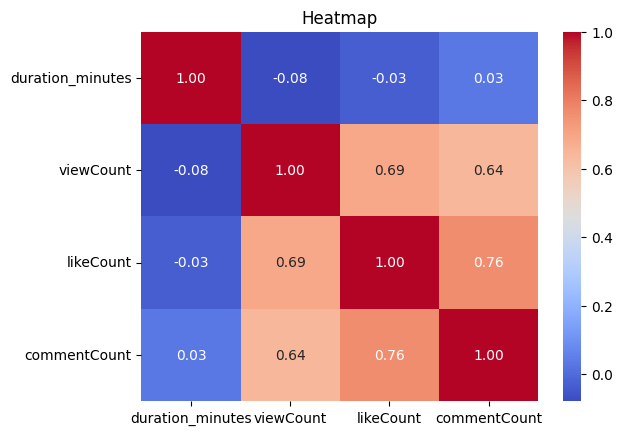

In [68]:
# Correlation Overview
# Creating a Heatmap
data = df.corr()
sns.heatmap(data, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Heatmap')
plt.show()

A correlation reflects the strength and/or direction of the association between two or more variables
ViewCount vs. LikeCount: Moderate correlation (0.64).
CommentCount vs. LikeCount: Strong correlation (0.76).
CommentCount vs. ViewCount: Moderate correlation (0.64).
Duration_minutes vs. ViewCount: Surprisingly weak correlation (0.08), indicating video duration has minimal impact on views.
Duration_minutes correlation: Weak with all other features.

In [69]:
# note to access a specific correlation value use the following
print(data['likeCount']['viewCount'])


0.6913555415226231


# Data Visualization

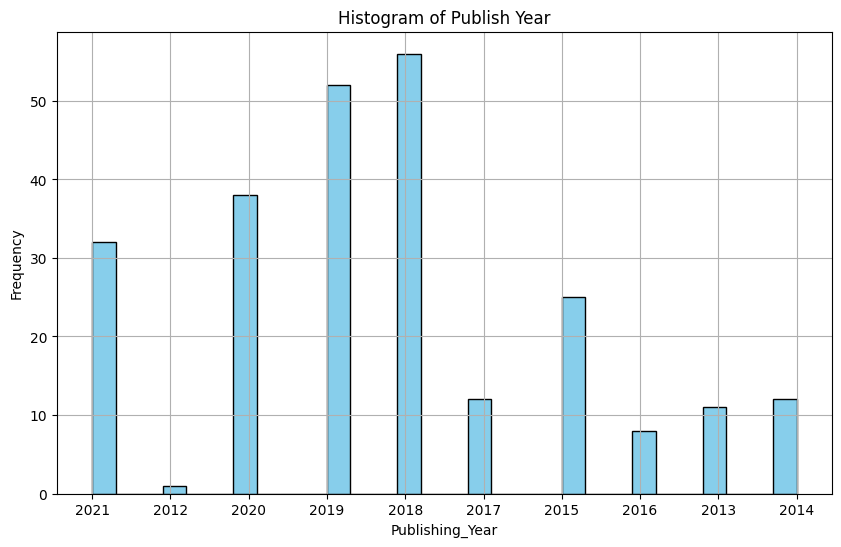

In [70]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['Publishing_Year'], bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Publishing_Year')
plt.ylabel('Frequency')
plt.title('Histogram of Publish Year')
plt.grid(True)
plt.show()

It appears that, based on the dataset available, the highest number of posted videos was in 2018, while the lowest number of posted videos was in 2012.

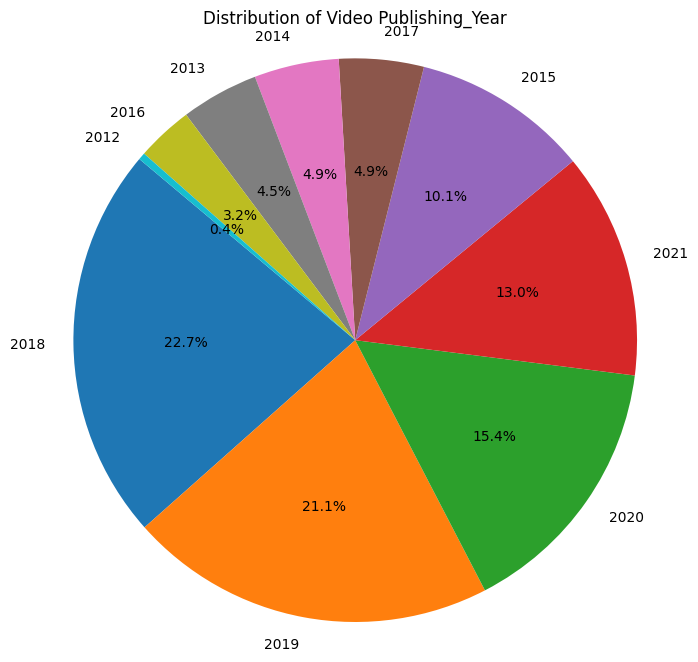

In [71]:
# another Publishing_Year plot
# Count the occurrences of each year
genre_counts = df['Publishing_Year'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Video Publishing_Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('')  # Remove the default 'Publishing_Year' label on the y-axis
plt.show()

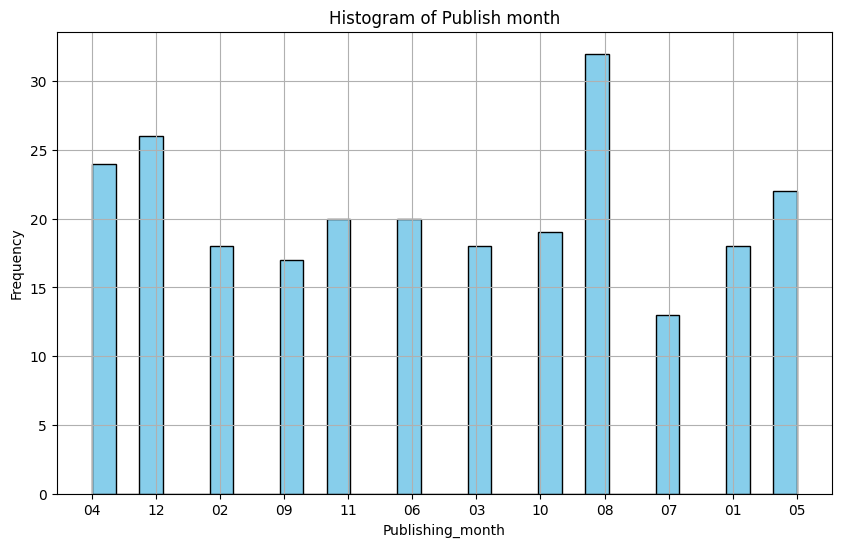

In [72]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df['Publishing_month'], bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Publishing_month')
plt.ylabel('Frequency')
plt.title('Histogram of Publish month')
plt.grid(True)
plt.show()

It appears that, based on the dataset available, the highest number of posted videos occurred in August, while the lowest number of posted videos was in July.

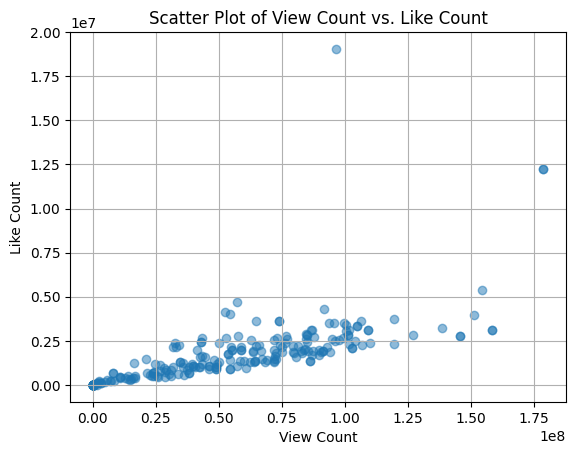

In [73]:
# Assuming you have a DataFrame named df with your data loaded

# Plotting scatter plot
plt.scatter(df['viewCount'], df['likeCount'], alpha=0.5)
plt.title('Scatter Plot of View Count vs. Like Count')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.grid(True)
plt.show()

Here, we observe a positive correlation between the two features

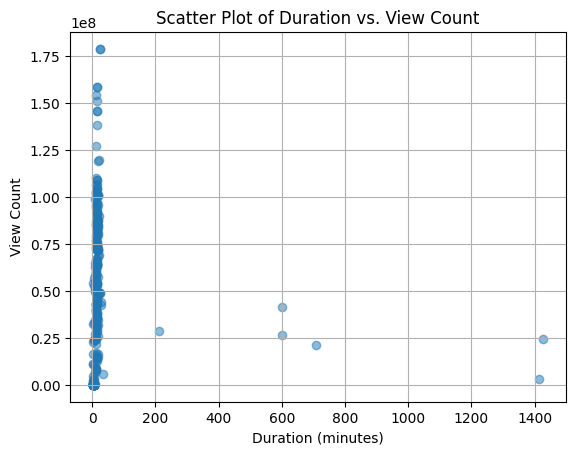

In [74]:
# Plotting scatter plot
# when dealing with scatter plots we have independent(changes) and dependent(how does it change when the independent change)  variable
plt.scatter(df['duration_minutes'], df['viewCount'], alpha=0.5)
plt.title('Scatter Plot of Duration vs. View Count')
plt.xlabel('Duration (minutes)')
plt.ylabel('View Count')
plt.grid(True)
plt.show()

all data points have the same value for the independent variable(Duration), and the dependent(viewCount) variable varies independently of it.
this plot may indicates one of the following:
1. lack of correlation between the independent and dependent variable, as the independent variable does not contribute to any variablity in the dependent variable
2. There is and issue with the data or the way it's being represented


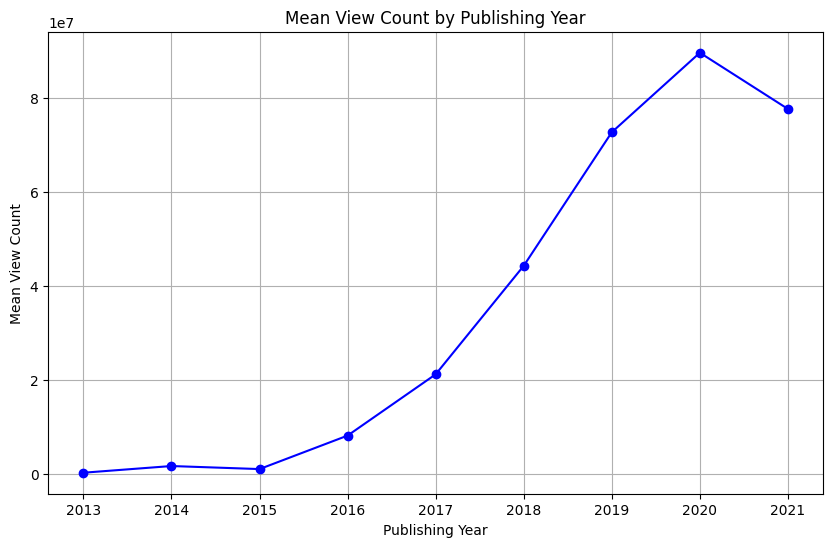

In [75]:
# Grouping data by 'Publishing_Year' and calculating the mean view count for each year,then we plot it
mean_viewcount_by_year = df.groupby('Publishing_Year')['viewCount'].mean()

# Plotting line plot
mean_viewcount_by_year.plot(marker='o', linestyle='-', color='b', figsize=(10, 6))
plt.title('Mean View Count by Publishing Year')
plt.xlabel('Publishing Year')
plt.ylabel('Mean View Count')
plt.grid(True)
plt.show()

We observe that the peak year, as indicated by the highest view count, was 2020. Subsequently, there was a slight decrease in views following 2020

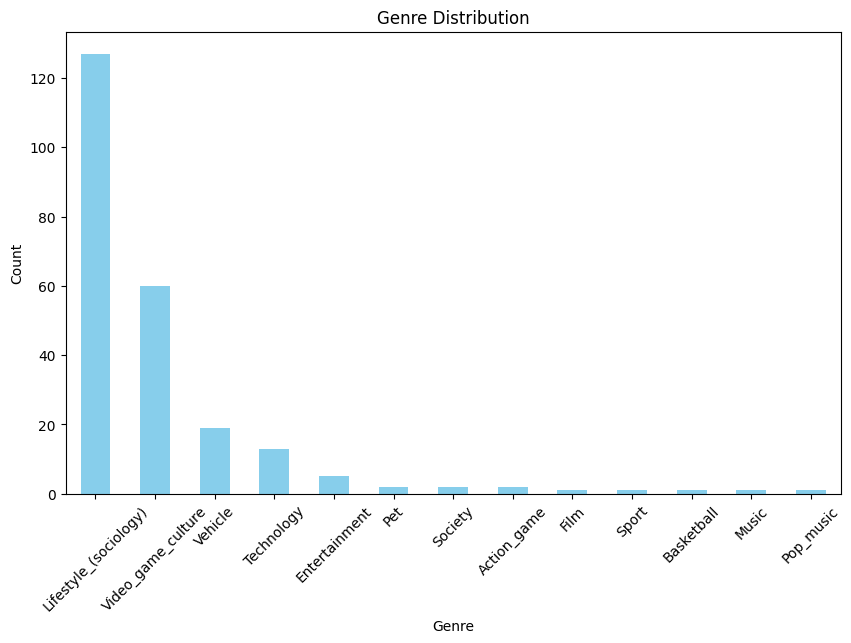

In [76]:
# Plotting bar plot for genre distribution
plt.figure(figsize=(10, 6))
genre_counts = df['genre'].value_counts()
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The majority of the videos in the dataset belong to the sociology genre

In [77]:
df.groupby(['genre'])[['viewCount']].mean()

,viewCount
genre,
Action_game,2.417617e+07
Basketball,2.295331e+07
Entertainment,3.664520e+07
Film,7.946483e+07
Lifestyle_(sociology),7.033602e+07
Music,4.157784e+07
Pet,1.047979e+08
Pop_music,2.667889e+07
Society,1.911226e+07


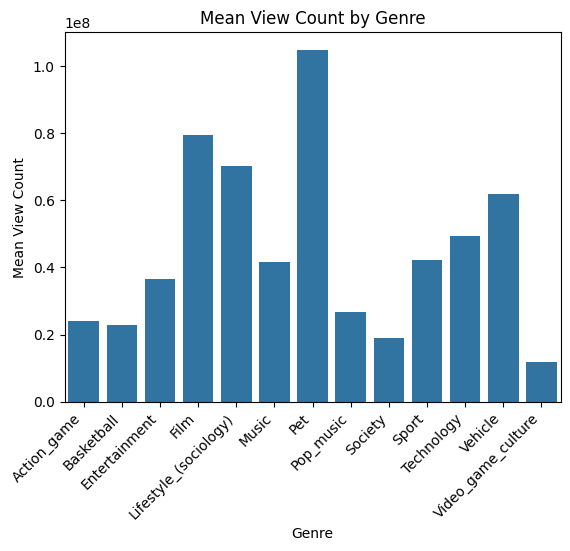

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'genre' and 'viewCount'

# Group by 'genre' and calculate the mean of 'viewCount'
grouped_data = df.groupby(['genre'])[['viewCount']].mean().reset_index()

# Plotting the grouped data
sns.barplot(x='genre', y='viewCount', data=grouped_data)
plt.xlabel('Genre')
plt.ylabel('Mean View Count')
plt.title('Mean View Count by Genre')

# Adjust rotation and horizontal alignment of x-axis tick labels
plt.xticks(rotation=45, horizontalalignment='right')  # Rotate the labels by 45 degrees and align them to the right

plt.show()

I observe that the highest number of views for a video belongs to the pet genre.

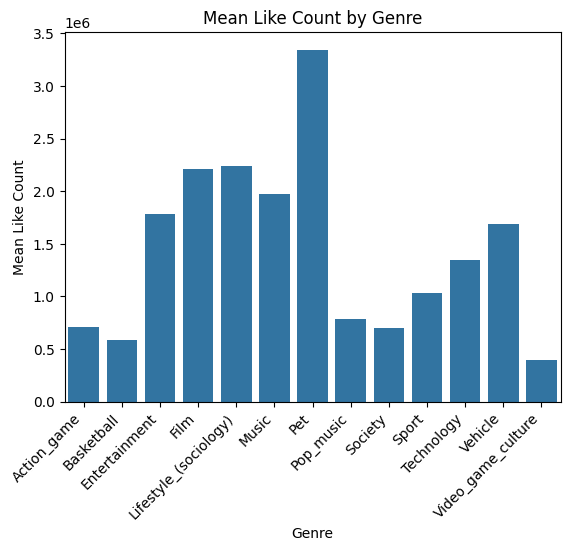

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'genre' and 'viewCount'

# Group by 'genre' and calculate the mean of 'viewCount'
grouped_data = df.groupby(['genre'])[['likeCount']].mean().reset_index()

# Plotting the grouped data
sns.barplot(x='genre', y='likeCount', data=grouped_data)
plt.xlabel('Genre')
plt.ylabel('Mean Like Count')
plt.title('Mean Like Count by Genre')

# Adjust rotation and horizontal alignment of x-axis tick labels
plt.xticks(rotation=45, horizontalalignment='right')  # Rotate the labels by 45 degrees and align them to the right

plt.show()

I observe that the highest number of likes for a video belongs to the pet genre.

In [80]:
# Group by --> The key function is used to determine the criterion for grouping
# grouping somthing my somehting
# for example for grouping et's say we have a list of tuples representing sales transactions, and we want to group these transactions by the month they occurred in.

In [81]:
print(df.query("genre == 'Pet'")['viewCount'])
print(df['viewCount'].max())

23     104797858.0
141    104797858.0
Name: viewCount, dtype: float64
178763228.0


In [82]:
print(df.query("genre == 'Pet'")['viewCount'].sum())

209595716.0


In [83]:
print(df.query("genre == 'Society'")['viewCount'].sum())

38224516.0


In [84]:
genre_of_the_highest_views = df.query('viewCount == 178763228.0')['genre']
genre_of_the_lowest_views = df.query('viewCount == 13954.0')['genre']
print(genre_of_the_highest_views)
print(genre_of_the_lowest_views)

49     Lifestyle_(sociology)
105    Lifestyle_(sociology)
Name: genre, dtype: object
222    Video_game_culture
Name: genre, dtype: object


# Final Report: Analysis of Mr Beast Youtube videos
## 1.Introduction
- The goal of this analysis is to understand what makes Mr. Beast's YouTube videos so popular by looking at all the different things that contribute to their success.
## 2.Data Description
- The dataset comprises 247 video records, encompassing 26 features such as video ID, view count, like count, comment count, and other variables that are detailed in our analysis.
## Summarized Analysis Results
- There's a moderate correlation (0.64) between view count and like count, indicating some relationship between the two.
The correlation between comment count and like count is strong (0.76), suggesting a strong relationship.
- Comment count and view count also show a moderate correlation (0.64), indicating some association between them.
- Surprisingly, video duration has a weak correlation (0.08) with view count, suggesting minimal impact on views.
- Video duration shows weak correlations with all other features.
- The dataset indicates that the highest number of posted videos was in 2018, while the lowest was in 2012.
- August had the highest number of posted videos, while July had the lowest.
- The peak year for views was 2020, with a slight decrease in views afterward.
- The majority of videos in the dataset belong to the sociology genre.
- The pet genre received the highest number of likes among the videos analyzed.
- In essence, the analysis suggests that likes and comments have stronger correlations with each other and with view count compared to video duration. The dataset also reveals trends in posting frequency and genre popularity.
## Future Work
- performing sentiment analysis on the video title, description, and snippet tags to evaluate their influence on viewer engagement and the likelihood of viewers clicking on the video.
## References
- kaggle: Mr Beast Youtube Video Statistics dataset
- Python libraries: pandas, random, scipy.stats, numpy, seaborn, matplotlib.pyplot
